#Imbalanced Classification

## 1. Defining the Question

Using past behaviour data predict whether a customer will leave the bank soon 

### b) Defining the Metric for Success

Build a model with the maximum possible F1 score. To pass the project, you need an F1
score of at least 0.59. Check the F1 for the test set.

Beta Bank customers are leaving: little by little, chipping away every month. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on
clients’ past behavior and termination of contracts with the bank.


### d) Recording the Experimental Design

Describe the steps/approach that you will use to answer the given question.




1.   Data Exploration

1.  Data Preparation

1.   Data Modeling
2.   Summary of Findings and Recommendations

2.   Imbalanced Classification



















### e) Data Relevance

How relevant was the provided data?
Very relevant

## 2. Reading the Data

In [27]:
# Importing our libraries 
# ---
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn import tree

In [28]:
# Load the data below
# --- 
# Dataset url = : : https://bit.ly/2XZK7Bo

# --- 
beta_bank_df = pd.read_csv('https://bit.ly/2XZK7Bo')

In [29]:
# Checking the first 5 rows of data
# ---
#
beta_bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [30]:
# Checking the last 5 rows of data
# ---
#
beta_bank_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [31]:
# Sample 10 rows of data
# ---
#
beta_bank_df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1712,1713,15744983,Burgmann,712,Spain,Male,47,1.0,139887.01,1,1,1,95719.73,0
9581,9582,15709256,Glover,850,France,Female,28,9.0,0.00,2,1,1,164864.67,0
3457,3458,15713370,Hunter,657,Spain,Male,36,8.0,188241.05,2,0,0,183058.51,1
1043,1044,15570417,Chien,579,France,Male,35,1.0,0.00,2,1,0,4460.20,0
1308,1309,15662294,Bennett,710,France,Male,33,10.0,118327.17,2,1,1,192928.82,0
9675,9676,15638621,Simmons,735,Spain,Male,39,1.0,60374.98,1,1,0,40223.74,0
2163,2164,15667554,Cameron,605,France,Male,35,6.0,0.00,2,1,1,45206.57,0
2963,2964,15718071,Tuan,655,France,Female,51,3.0,0.00,2,0,1,15801.02,0
8250,8251,15688865,Wade,850,France,Female,35,9.0,0.00,2,0,0,25329.48,0
4434,4435,15568429,Mitchell,633,Spain,Female,46,3.0,0.00,2,1,0,120250.58,0


In [32]:
# Checking number of rows and columns
# ---
#  
beta_bank_df.shape

(10000, 14)

In [33]:
# Checking datatypes
# ---
beta_bank_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [34]:
beta_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Record your observations below:


*   The data provided has 10000 rows and 14 columns



## 4. Data Preparation

### Performing Data Cleaning

In [36]:
# Checking missing entries of all the variables. 
# ---
# beta_bank_df.isnull().sum()
pd.DataFrame(beta_bank_df.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,909
Balance,0
NumOfProducts,0


We observe the following from our dataset:

*  Column Teunre has 909 missing values 



In [37]:
# Standardizing your dataset i.e. variable renaming 
# we make all our column headings to have lower case characters and check the first five rows to confirm changes
beta_bank_df.columns = beta_bank_df.columns.str.lower()
beta_bank_df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


We observe the following from our dataset:

*   We renamed all columns to have lower cases and checked to confirm the changes. All columns now have lower cases in the column names.



In [38]:
# Checking how many duplicate rows are there in the data
# ---
beta_bank_df.duplicated().sum()

0

We observe the following from our dataset:

*   There are no duplicates in our data



In [39]:
# Checking if any of the columns are all null
# ---
beta_bank_df.isnull().all(axis = 0)

rownumber          False
customerid         False
surname            False
creditscore        False
geography          False
gender             False
age                False
tenure             False
balance            False
numofproducts      False
hascrcard          False
isactivemember     False
estimatedsalary    False
exited             False
dtype: bool

We observe the following from our dataset:

*   None of the columns contains all null values



In [40]:
# Checking if any of the rows are all null
# ---
sum(beta_bank_df.isnull().all(axis = 1))

0

We observe the following from our dataset:

*   No row contains completely null values



In [41]:
#creating a copy of our dataframe 
#
# ---
#
df_clean = beta_bank_df.copy()
df_clean.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [43]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


fixing Missing values  in tenure

In [44]:
df_clean['tenure'] = df_clean['tenure'].fillna(0)
pd.DataFrame(df_clean.isnull().sum(), columns=["Number of Missing Values"])

,Number of Missing Values
rownumber,0
customerid,0
surname,0
creditscore,0
geography,0
gender,0
age,0
tenure,0
balance,0
numofproducts,0


In [45]:
# Drop and reassign dataframe
df_clean = df_clean.drop(['rownumber', 'customerid', 'surname'], axis = 1 )

# View first few 5 rows
df_clean.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [46]:
df_clean.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score

Geography and Gender columns housed categorical values, so we need to change that as Machine Learning Models take only numerical values

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_clean["gender"] = le.fit_transform(df_clean["gender"])
df_clean["geography"] = le.fit_transform(df_clean["geography"])

In [59]:
df_clean.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0


Splitting the dataframe

In [60]:
X = df_clean.drop("exited", axis = 1)
y = df_clean["exited"]

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')

print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')


X_train has 8000 rows, y_train also has 8000 rows
X_test has 2000 rows, y_test also has 2000 rows


Comparing Acuracy

Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


model.fit(X_train, y_train)


model_y_pred = model.predict(X_test)

# Accuracy Score
model_score = accuracy_score(model_y_pred, y_test)
print(model_score)


0.789


Random Forest

In [62]:

rf = RandomForestClassifier(n_estimators = 15, random_state = 200)


rf.fit(X_train, y_train)


rf_y_pred = rf.predict(X_test)

#  Accuracy Score
rf_score = accuracy_score(rf_y_pred, y_test)
rf_score


0.8615

Decision Tree Classifier

In [63]:
dt = tree.DecisionTreeClassifier()


dt.fit(X_train, y_train)


dt_y_pred = dt.predict(X_test)

# Accuracy Score
dt_score = accuracy_score(dt_y_pred, y_test)
print(dt_score)


0.781


F1 score

In [64]:
# Call Model 
rf = RandomForestClassifier(n_estimators = 15, random_state = 200)

# Fit the model
rf.fit(X_train, y_train)

# Predition on test data
rf_y_pred = rf.predict(X_test)

# Model Evaluation - Accuracy Score
rf_score = accuracy_score(rf_y_pred, y_test)

print('F1 score is ',f1_score(y_test, rf_y_pred))

F1 score is  0.6014388489208634


0    0.7963
1    0.2037
Name: exited, dtype: float64


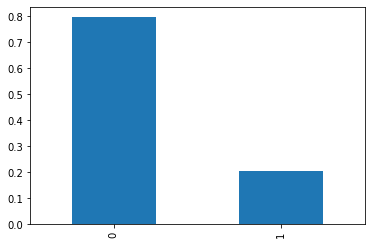

In [67]:
class_frequency = df_clean['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');


Only 2% of clients are unlucky.

Conclusion 



1.  F1 score is  0.6014388489208634
2.   We see that the best model is the Random Forest Classifier. with an accuracy of 0.86

